# Definition
[Video lecture](https://www.youtube.com/watch?v=OA4viERrlzA&t=3s).

The signal to noise ratio SNR is defined as: 
$$SNR = \frac{\text{Received Signal Power}}{\text{Noise Power}}$$

Transmitted signal power:
- 1 mW (Blue-tooth)
- 100 mW (Mobile phone)
- 40 W (Base station)

We usually use decibel scale for the signal power, dBm = decibel of milli-watt (mW).
We use $ 10*log_{10}\left(\frac{\text{Signal Power}}{\text{1 mW}}\right) $ to convert
from Watt to dBm.
Then we have:
- 1 mW = 0 dBm
- 10 mW = 10 dBm
- 100 mW = 20 dBm
- 40 W = 46 dBm

# Channel Gain
The power is equally spread on the surface area if we have an isotropic antenna. For 
example, if we are at the distance $d$, then $\text{Surface area} = 4\pi d^2$. 
The received power also depends on how large is the antenna of the received device. 
For isotropic antenna, the size of the antenna depends on the wavelength that we are 
communicating at, $\lambda = \frac{v}{f}$,  $ Area = \frac{\lambda^2}{4\pi}$, where 
$v$ is the speed of light. With $f = 3 GHz$, then $\lambda = 300000/3000000 = 0.1 \text{ (m)}$ = 10 cm,
Area = 8 $cm^2$.

The channel gain in decibel scale: 
$$\text{Channel gain} = 10log_{10}\left(\frac{\lambda^2}{(4\pi d)^2}\right) = 10log_{10}\left(\frac{\lambda^2}{(4\pi)^2}\right) - 20log_{10}(d) \text{ [dB]}$$ 

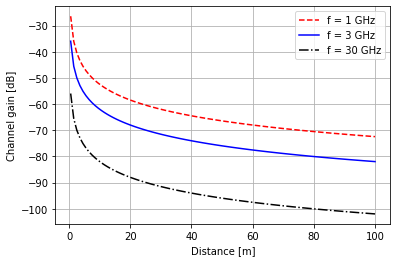

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def channel_gain(d, f):
    return 10*log10((3*10**8/f)**2/(4*pi)**2) - 20*log10(d)

distance = np.linspace(0.5, 100, 100)
frequency = [10**9, 3*10**9, 30*10**9]
channel_gains = np.zeros((len(frequency), distance.size))
for index, freq in enumerate(frequency):
    channel_gains[index, :] = [channel_gain(dist, freq) for dist in distance]

plt.plot(distance, channel_gains[0, :], 'r--',
         distance, channel_gains[1, :], 'b',
         distance, channel_gains[2, :], 'k-.')
plt.xlabel('Distance [m]')
plt.ylabel('Channel gain [dB]')
plt.legend(('f = 1 GHz', 'f = 3 GHz', 'f = 30 GHz'))
plt.grid(True)

# Noise Power
The noise power is also very small. Consider that the power spectral density at 
room temperature is $N_{0}=10^{-14.4} \text{ W/Hz}$, and the Bandwidth $B=10 \text{ MHz}$.
The noise power/variance $N_{0}B$ in dBm is: $-174+10log_{10}(B)$. We have 
the SNR as:
$$SNR=\frac{\text{Transmit Power}*\text{Channel Gain}}{\text{Noise Power}}$$

The SNR in decibel scale as:
$$SNR=10*log10(P)+\left(10log_{10}\left(\frac{\lambda^2}{(4\pi)^2}\right) - 20log_{10}(d)\right)-(-174+10log_{10}(B))$$
where P in [mW].

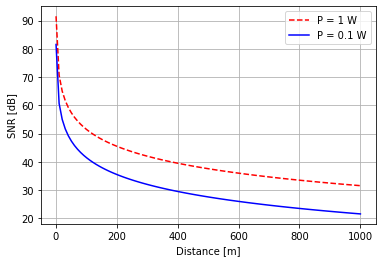

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log10, pi

def snr(d, f, p, b):
    """
    d in m, f in Hz, P in mW, B in Hz
    """
    return 10*log10(p)+(10*log10((3*10**8/f)**2/(4*pi)**2) - 20*log10(d))-(-174+10*log10(b))

distance = np.linspace(1, 1000, 100)
bandwidth = 10*10**6 # 10 MHz
transmit_powers = [1, 0.1]*1000
snrs = np.zeros((len(transmit_powers), distance.size))
frequency = 10**8 # 100 MHz
for index, tran_power in enumerate(transmit_powers):
    snrs[index, :] = [snr(dist, frequency, tran_power, bandwidth) for dist in distance]

plt.plot(distance, snrs[0, :], 'r--',
         distance, snrs[1, :], 'b')
plt.xlabel('Distance [m]')
plt.ylabel('SNR [dB]')
plt.legend(('P = 1 W', 'P = 0.1 W'))
plt.grid(True)
